# Homework on Ensemble Learners

**Hint**: Most of the tasks can be done with slight adaptations of the code that was demonstrated in class

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # this will silence warnings that are likely to appear during GridSearch (but also others ...)
warnings.filterwarnings("ignore")

### 1. Prepare Data Set

#### A. Obtain the data
1. Import the [breast cancer dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset)
2. Check that the class labels are already encoded

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data, target = load_breast_cancer(return_X_y=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### B. Prepare the data
1. Apply *standard scaling*
2. Split the data, setting aside 30% for testing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data_std = sc.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data_std, target, test_size=0.30, random_state=1)

#### C. print out the number of training samples and test samples

In [4]:
print("test samples: %s" % (len(X_train)))
print("training samples: %s" % (len(X_test)))

test samples: 398
training samples: 171


### 2. Select the most important features

**Hint**: You might want to check the sample solution for the homework on classification to help with this ...
#### A. Find features
Use a Decision Tree classifier to select the two most important features and keep only those for training and testing

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',random_state=0)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))


Decision tree train/test accuracies 1.000/0.906


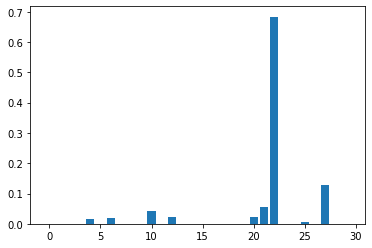

In [6]:
from matplotlib import pyplot

pyplot.bar(range(len(tree.feature_importances_)), tree.feature_importances_)
pyplot.show()

#### B. Print the indexes of the most important features

In [7]:
importances = tree.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 0 26 24 23 19 18 17 16 15 28 13 14 29  1  9  8  7  5 11  2  3 25  4  6
 20 12 10 21 27 22]


In [8]:
a = np.array(tree.feature_importances_)
b = [22,27]
print(list(a[b]))

[0.6837238551555163, 0.1295149412586525]


In [9]:
# use only the two most importan features
X_train, X_test, y_train, y_test = train_test_split(data_std[:,[22,27]], target, test_size=0.30, random_state=1)

tree = DecisionTreeClassifier(criterion='entropy',random_state=0)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))



Decision tree train/test accuracies 1.000/0.901


### 3. Construct and cross-validate a voting classifier
1. Use a *perceptron* as one base classifier (with a maximum of 50 Iterations, a tolerance of $10^{-3}$ and a random state of $0$)
2. Use a *Gaussian Naive Bayes* as the second base classifier (from the `naive_bayes` module; no parameters needed)
3. Use a *Support Vector Classifier* as the third base classifier (from the `svm` module; set `gamma` to `'auto'` and choose a random state of $0$)
4. Use *hard voting* in the voting classifier
5. Use *accuracy* as the scoring criterion in cross validation

In [10]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score # sklearn.cross_validation has been superseded

clf_per = Perceptron(max_iter=50, tol=1e-3, random_state=0)
clf_nb = GaussianNB()
clf_svm = svm.SVC(gamma='auto', random_state=0)
clf_vc = VotingClassifier(estimators=[('per',clf_per), ('nb',clf_nb), ('svm',clf_svm)], voting='hard')

clf_labels = ['Perceptron', 'Naive Bayes', 'Support Vector']
print('10-fold cross validation:\n')
for clf, label in zip([clf_per, clf_nb, clf_svm], clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='accuracy') 
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.95 (+/- 0.03) [Perceptron]
ROC AUC: 0.95 (+/- 0.03) [Naive Bayes]
ROC AUC: 0.94 (+/- 0.03) [Support Vector]


In [11]:
clf_labels += ['Majority Voting']
all_clf = [clf_per, clf_nb, clf_svm, clf_vc]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='accuracy')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

ROC AUC: 0.95 (+/- 0.03) [Perceptron]
ROC AUC: 0.95 (+/- 0.03) [Naive Bayes]
ROC AUC: 0.94 (+/- 0.03) [Support Vector]
ROC AUC: 0.94 (+/- 0.03) [Majority Voting]


### 4. Plot the decision regions of the voting classifier as well as the base classifiers

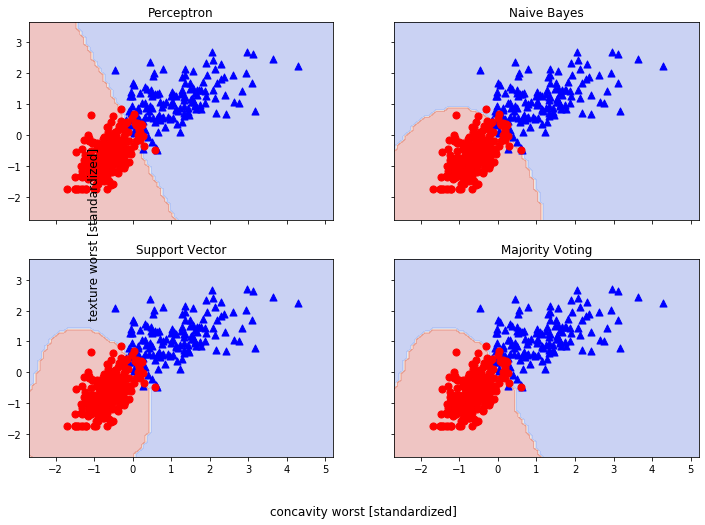

In [12]:
from itertools import product

# now the data is scaled anyway and we do not need the pipelines anymore

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=2, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(12, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        all_clf, clf_labels):
    clf.fit(X_train, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0], 
                                  X_train[y_train==0, 1], 
                                  c='blue', 
                                  marker='^',
                                  s=50)
    
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0], 
                                  X_train[y_train==1, 1], 
                                  c='red', 
                                  marker='o',
                                  s=50)
    
    axarr[idx[0], idx[1]].set_title(tt)

plt.text(-3.5, -4.5, 
         s='concavity worst [standardized]', 
         ha='center', va='center', fontsize=12)
plt.text(-10.5, 4.5, 
         s='texture worst [standardized]', 
         ha='center', va='center', 
         fontsize=12, rotation=90)

# plt.tight_layout()
# plt.savefig('./figures/voting_panel', bbox_inches='tight', dpi=300)
plt.show()

### 5. Check which parameters you might adapt in the voting classifier

In [13]:
clf_vc.get_params()

{'estimators': [('per',
   Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
              fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
              penalty=None, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)),
  ('nb', GaussianNB(priors=None, var_smoothing=1e-09)),
  ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
       max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
       verbose=False))],
 'flatten_transform': True,
 'n_jobs': None,
 'voting': 'hard',
 'weights': None,
 'per': Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=Fa

### 6. Perform a grid search using the number of iterations for the perceptron and the support vector machine
1. For the perceptron, try 5, 10, and 20 iterations
2. For the SVM, try 200, 400, and 1000 iterations

In [14]:
from sklearn.model_selection import GridSearchCV  # grid_search is now also part of model selection

params = {'per__max_iter': [5,10,20],
          'svm__max_iter': [200,400,1000]}

grid = GridSearchCV(estimator=clf_vc, 
                    param_grid=params, 
                    cv=10, 
                    scoring='accuracy')
grid.fit(X_train, y_train)

grid_scores = zip(grid.cv_results_['params'],
                  grid.cv_results_['mean_test_score'],
                  grid.cv_results_['std_test_score'])

for params, mean_score, std_score in grid_scores:
    print("%0.3f+/-%0.2f %r"
            % (mean_score, std_score / 2, params))



0.942+/-0.02 {'per__max_iter': 5, 'svm__max_iter': 200}
0.942+/-0.02 {'per__max_iter': 5, 'svm__max_iter': 400}
0.942+/-0.02 {'per__max_iter': 5, 'svm__max_iter': 1000}
0.942+/-0.02 {'per__max_iter': 10, 'svm__max_iter': 200}
0.942+/-0.02 {'per__max_iter': 10, 'svm__max_iter': 400}
0.942+/-0.02 {'per__max_iter': 10, 'svm__max_iter': 1000}
0.942+/-0.02 {'per__max_iter': 20, 'svm__max_iter': 200}
0.942+/-0.02 {'per__max_iter': 20, 'svm__max_iter': 400}
0.942+/-0.02 {'per__max_iter': 20, 'svm__max_iter': 1000}


In [15]:
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Best parameters: {'per__max_iter': 5, 'svm__max_iter': 200}
Accuracy: 0.94


### 7. Train an Adaboost classifier with a perceptron as a base classifier as well as a random forest and compare their respective accuracies (also to the base classifier)
1. For the perceptron, use the same parameters as above except for the maximum number of iterations which should be 5.
2. Since the perceptron does not offer class probabilities, you must specify `algorithm='SAMME'` for Adaboost. Apart from this (and the *base estimator*), you can use the parameters we employed in class.
3. For the random forest, you can use the parameters we employed in class.

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

per =  Perceptron(max_iter=5, tol=1e-3, random_state=0)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)


ada_per = AdaBoostClassifier(base_estimator=per,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0,
                         algorithm='SAMME')

ada_forest = AdaBoostClassifier(base_estimator=forest,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0,
                         algorithm='SAMME')


per = per.fit(X_train, y_train)
y_train_pred = per.predict(X_train)
y_test_pred = per.predict(X_test)

per_train = accuracy_score(y_train, y_train_pred)
per_test = accuracy_score(y_test, y_test_pred)
print('Perceptrom train/test accuracies %.3f/%.3f'
      % (per_train, per_test))


forest = forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

forest_train = accuracy_score(y_train, y_train_pred) 
forest_test = accuracy_score(y_test, y_test_pred) 
print('Random forest train/test accuracies %.3f/%.3f'
      % (forest_train, forest_test))


ada_per = ada_per.fit(X_train, y_train)
y_train_pred = ada_per.predict(X_train)
y_test_pred = ada_per.predict(X_test)

ada_per_train = accuracy_score(y_train, y_train_pred) 
ada_per_test = accuracy_score(y_test, y_test_pred) 
print('Ada Perceptron train/test accuracies %.3f/%.3f'
      % (ada_per_train, ada_per_test))


ada_forest = ada_forest.fit(X_train, y_train)
y_train_pred = ada_forest.predict(X_train)
y_test_pred = ada_forest.predict(X_test)

ada_forest_train = accuracy_score(y_train, y_train_pred) 
ada_forest_test = accuracy_score(y_test, y_test_pred) 
print('Ada Random Forest train/test accuracies %.3f/%.3f'
      % (ada_forest_train, ada_forest_test))



Perceptrom train/test accuracies 0.952/0.912
Random forest train/test accuracies 1.000/0.918
Ada Perceptron train/test accuracies 0.952/0.924
Ada Random Forest train/test accuracies 1.000/0.918


### 8.  Plot the decision regions for the classifiers you just constructed

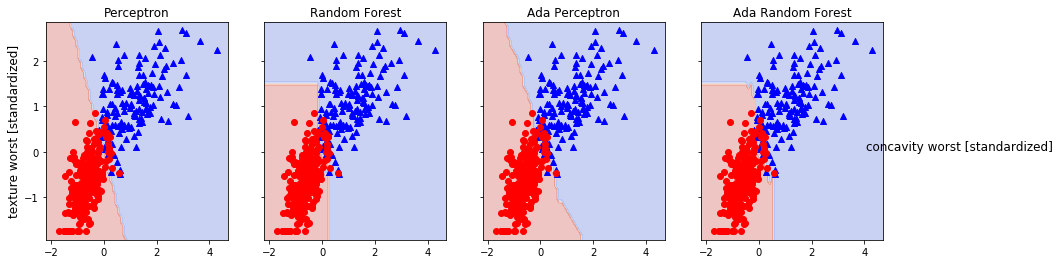

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 0.5
x_max = X_train[:, 0].max() + 0.5
y_min = X_train[:, 1].min() - 0.2
y_max = X_train[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=4, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(15, 4))


for idx, clf, tt in zip([0, 1, 2, 3],
                        [per, forest, ada_per, ada_forest],
                        ['Perceptron', 'Random Forest', 'Ada Perceptron', 'Ada Random Forest']):
    clf.fit(X_train, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0], 
                       X_train[y_train==0, 1], 
                       c='blue', marker='^')
    
    axarr[idx].scatter(X_train[y_train==1, 0], 
                       X_train[y_train==1, 1], 
                       c='red', marker='o')
    
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('texture worst [standardized]', fontsize=12)
plt.text(7.6, 0.1, 
         s='concavity worst [standardized]', 
         ha='center', va='center', fontsize=12)
    
# plt.tight_layout()
#plt.savefig('./figures/bagging_region.png', 
#            dpi=300, 
#            bbox_inches='tight')
plt.show()